In [2]:
#Generalized AutoRegressive Conditional Heteroskedasticity

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

In [8]:
# Fetching Apple stock data
#ticker = 'AAPL'
ticker = 'D'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  81.199997  81.669998  80.010002  80.279999  59.599335   2163600
2018-01-03  77.000000  78.449997  76.250000  77.190002  57.305325  14587400
2018-01-04  77.300003  78.139999  76.440002  76.830002  57.038074   7146600
2018-01-05  77.400002  77.699997  76.430000  76.839996  57.045502   5758300
2018-01-08  77.110001  78.559998  76.760002  78.019997  57.921509   5570000


In [9]:
# Calculate log returns
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Rescale log returns by a constant factor
scale_factor = 100
data['Log_Returns'] = data['Log_Returns'] * scale_factor

# Drop the NaN values that result from the shift
data = data.dropna()

# Display the first few rows of log returns
print(data[['Adj Close', 'Log_Returns']].head())

            Adj Close  Log_Returns
Date                              
2018-01-03  57.305325    -3.925087
2018-01-04  57.038074    -0.467453
2018-01-05  57.045502     0.013021
2018-01-08  57.921509     1.523957
2018-01-09  57.320187    -1.043594


In [10]:
# Fit GARCH(1, 1) model
model = arch_model(data['Log_Returns'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Display the model summary
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 342386634515.95654
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2840943867.963688
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2571.288206732279
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2622.6126536957195
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2098.6783710389013
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2091.614477917651
Iteration:      7,   Func. Count:     46,   Neg. LLF: 2091.6112284309165
Iteration:      8,   Func. Count:     51,   Neg. LLF: 2091.610730445803
Iteration:      9,   Func. Count:     56,   Neg. LLF: 2091.610727025679
Iteration:     10,   Func. Count:     60,   Neg. LLF: 2091.6107270269467
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2091.610727025679
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results          

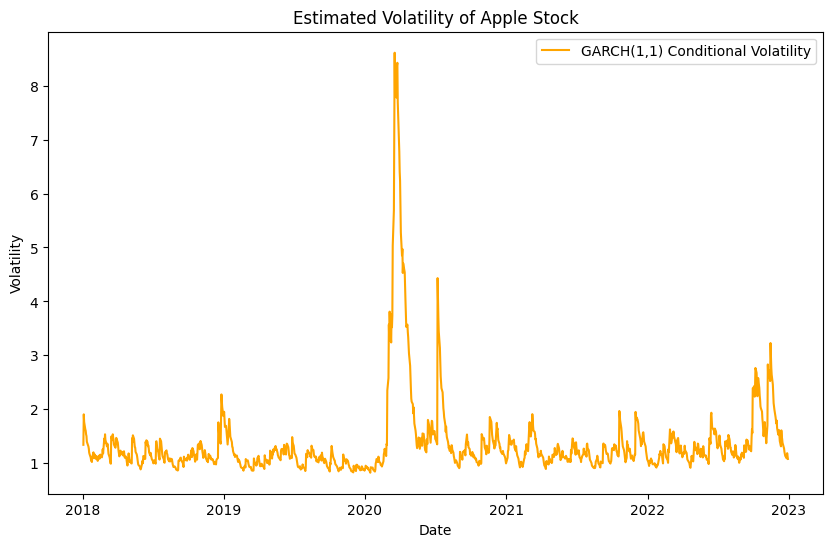

In [11]:
# Plot the estimated volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, label='GARCH(1,1) Conditional Volatility', color='orange')
plt.title('Estimated Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

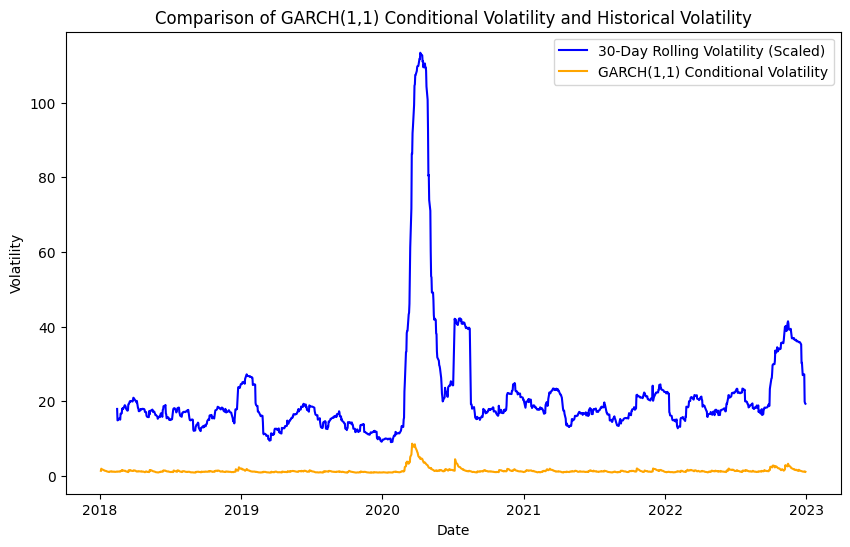

In [12]:
# Calculate rolling standard deviation for comparison (annualized)
rolling_volatility = data['Log_Returns'].rolling(window=30).std() * np.sqrt(252)  # Annualizing

# Now plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(rolling_volatility, label='30-Day Rolling Volatility (Scaled)', color='blue')
plt.plot(garch_fit.conditional_volatility, label='GARCH(1,1) Conditional Volatility', color='orange')
plt.title('Comparison of GARCH(1,1) Conditional Volatility and Historical Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [13]:
# Forecast future volatility
forecasts = garch_fit.forecast(horizon=5)  # Forecasting for the next 5 days
forecasted_volatility = forecasts.variance.values[-1, :]**0.5  # Extracting the forecasted volatility
print("Forecasted Volatility for Next 5 Days:", forecasted_volatility)

Forecasted Volatility for Next 5 Days: [1.04545123 1.06694813 1.08703967 1.10584778 1.12347942]
